In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math #needed for square root (.sqrt)

# OPTION 1 - import dataset from statsmodels
# import statsmodels.api as sm
#smdataset = sm.datasets.get_rdataset("tips", "reshape2")
#tips = smdataset.data
#doc = smdataset.__doc__
#print(doc)

# OPTION 2 - import dataset from our github repository
url = "https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/reshape2/tips.csv"
tips = pd.read_csv(url)

print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
print("Total bill")
tb = tips["total_bill"]
print("Count:", tb.count())
print("Mean:", tb.mean())
print("Median:", tb.median())
print("Min:", tb.min())
print("Max:", tb.max())
print("Range:", tb.max() - tb.min())
print("Std Dev:", tb.std())
print("Quartiles:\n", tb.quantile([0.25, 0.5, 0.75]))
print("IQR:", tb.quantile(0.75) - tb.quantile(0.25))

# still have to figure out outliers
#outliers = tb[(tb < lower_fence) | (tb > upper_fence)]
#print("Outliers: ", outliers)

Total bill
Count: 244
Mean: 19.78594262295082
Median: 17.795
Min: 3.07
Max: 50.81
Range: 47.74
Std Dev: 8.902411954856856
Quartiles:
 0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64
IQR: 10.779999999999998


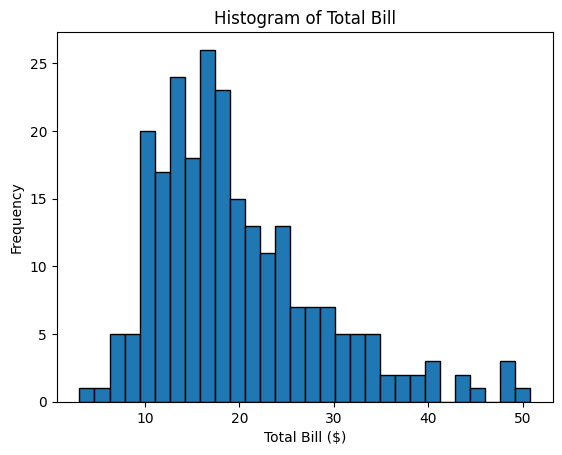

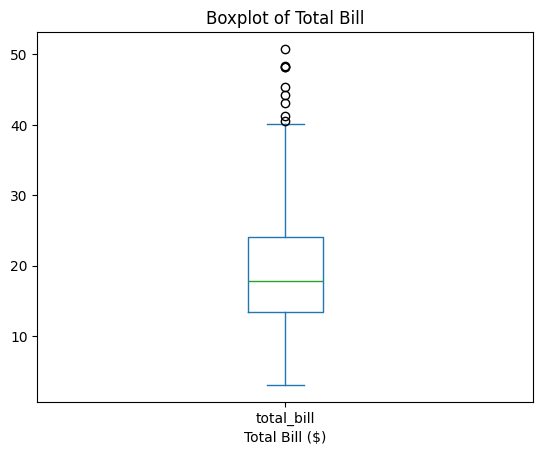

In [ ]:
# === Visualization: Histogram ===
plt.hist(tb, bins=30, edgecolor="black")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Total Bill")
plt.show()

# === Visualization: Boxplot with pandas===
tips["total_bill"].plot(kind="box")
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill ($)")
plt.show()

Tip
Count: 244
Mean: 2.99827868852459
Median: 2.9
Min: 1.0
Max: 10.0
Range: 9.0
Std Dev: 1.3836381890011826
Quartiles:
 0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64
IQR: 1.5750000000000002
Lower fence: -0.36250000000000027
Upper fence: 5.9375
Outliers:
 23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
Name: tip, dtype: float64


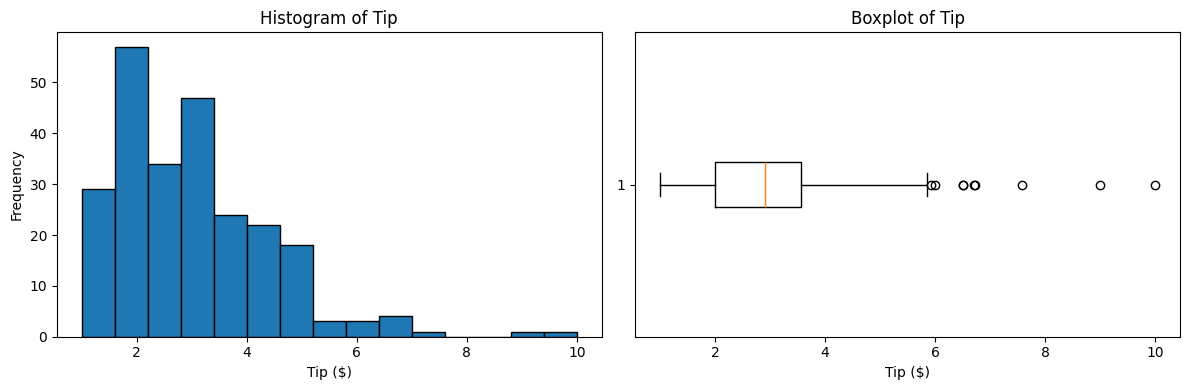

In [ ]:
tp = tips["tip"]

print("Tip")
print("Count:", tp.count())
print("Mean:", tp.mean())
print("Median:", tp.median())
print("Min:", tp.min())
print("Max:", tp.max())
print("Range:", tp.max() - tp.min())
print("Std Dev:", tp.std())
print("Quartiles:\n", tp.quantile([0.25, 0.5, 0.75]))

# Tukey method for IQR and fences
Q1 = tp.quantile(0.25, interpolation="midpoint")
Q3 = tp.quantile(0.75, interpolation="midpoint")
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)

# Outliers
outliers = tp[(tp < lower_fence) | (tp > upper_fence)]
print("Outliers:\n", outliers)

# === Visualizations ===
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(tp, bins=15, edgecolor="black")
axes[0].set_title("Histogram of Tip")
axes[0].set_xlabel("Tip ($)")
axes[0].set_ylabel("Frequency")

# Boxplot
axes[1].boxplot(tp, vert=False, whis=1.5)
axes[1].set_title("Boxplot of Tip")
axes[1].set_xlabel("Tip ($)")

plt.tight_layout()
plt.show()

Table Size
Count: 244
Mean: 2.569672131147541
Median: 2.0
Mode: [2]
Min: 1
Max: 6
Range: 5
Std Dev: 0.9510998047322332
Quartiles:
 0.25    2.0
0.50    2.0
0.75    3.0
Name: size, dtype: float64
IQR: 1.0
Lower fence: 0.5
Upper fence: 4.5
Outliers:
 125    6
141    6
142    5
143    6
155    5
156    6
185    5
187    5
216    5
Name: size, dtype: int64


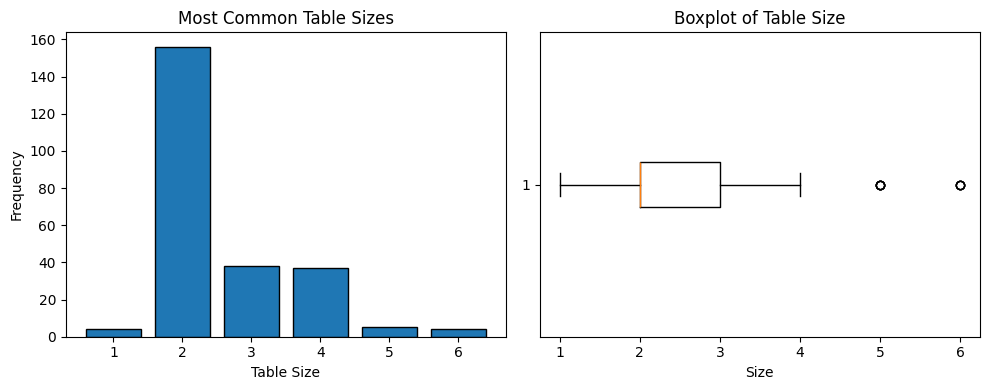

In [ ]:

sz = tips["size"]

print("Table Size")
print("Count:", sz.count())
print("Mean:", sz.mean())
print("Median:", sz.median())
print("Mode:", sz.mode().values)   # most common table size
print("Min:", sz.min())
print("Max:", sz.max())
print("Range:", sz.max() - sz.min())
print("Std Dev:", sz.std())
print("Quartiles:\n", sz.quantile([0.25, 0.5, 0.75]))

# Tukey method for IQR and fences
Q1 = sz.quantile(0.25, interpolation="midpoint")
Q3 = sz.quantile(0.75, interpolation="midpoint")
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)

# Outliers
outliers = sz[(sz < lower_fence) | (sz > upper_fence)]
print("Outliers:\n", outliers)

# === Visualization ===
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart (better for discrete counts)
axes[0].bar(sz.value_counts().index, sz.value_counts().values, edgecolor="black")
axes[0].set_title("Most Common Table Sizes")
axes[0].set_xlabel("Table Size")
axes[0].set_ylabel("Frequency")

# Boxplot (still valid for discrete)
axes[1].boxplot(sz, vert=False, whis=1.5)
axes[1].set_title("Boxplot of Table Size")
axes[1].set_xlabel("Size")

plt.tight_layout()
plt.show()


Sex
Count: 244
Unique categories: ['Female' 'Male']
Frequencies:
 sex
Male      157
Female     87
Name: count, dtype: int64
Proportions:
 sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64
Most common (mode): Male


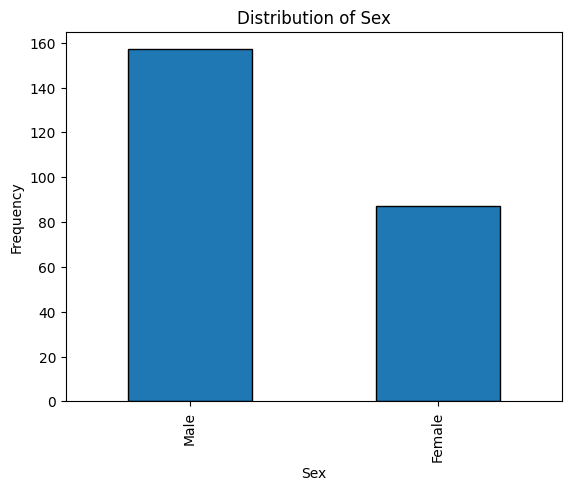

In [ ]:
sex = tips["sex"]

print("Sex")
print("Count:", sex.count())
print("Unique categories:", sex.unique())
print("Frequencies:\n", sex.value_counts())
print("Proportions:\n", sex.value_counts(normalize=True))
print("Most common (mode):", sex.mode().values[0])

# === Visualization ===
sex.value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

Day
Count: 244
Unique categories: ['Sun' 'Sat' 'Thur' 'Fri']
Frequencies:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Proportions:
 day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64
Most common day (mode): Sat


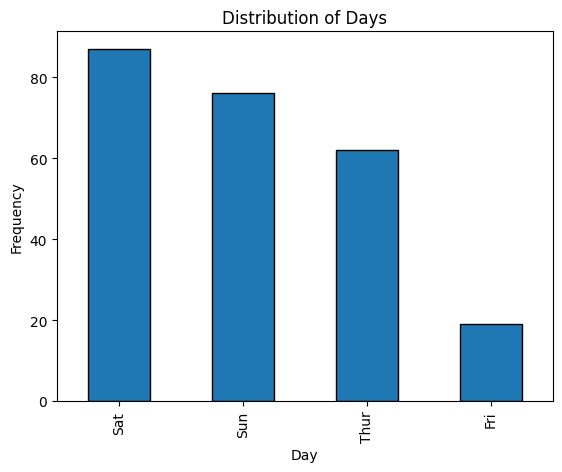

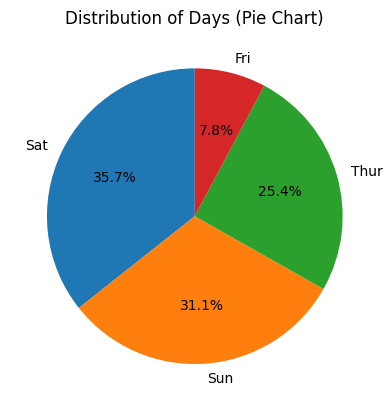

In [ ]:
day = tips["day"]

print("Day")
print("Count:", day.count())
print("Unique categories:", day.unique())
print("Frequencies:\n", day.value_counts())
print("Proportions:\n", day.value_counts(normalize=True))
print("Most common day (mode):", day.mode().values[0])

# === Visualization ===
# Bar chart
day.value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Days")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()

# Pie chart
day.value_counts().plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90,
    ylabel=""  # removes label
)
plt.title("Distribution of Days (Pie Chart)")
plt.show()

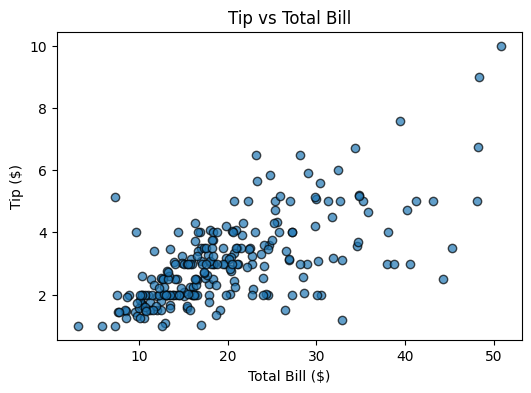

In [ ]:
# Scatter plot: total_bill vs tip
plt.figure(figsize=(6,4))
plt.scatter(tips["total_bill"], tips["tip"], alpha=0.7, edgecolor="black")
plt.title("Tip vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

Average tip by smoker status:
smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


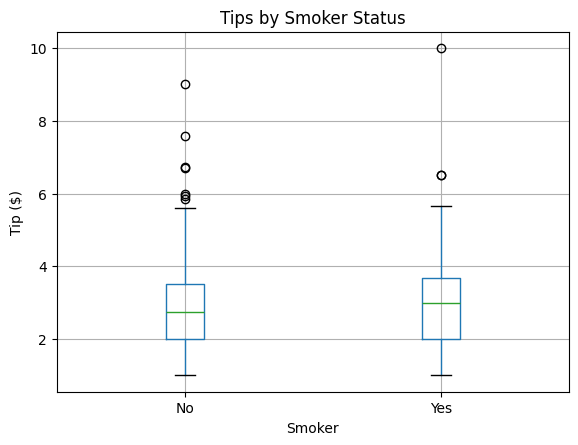

In [ ]:

print("Average tip by smoker status:")
print(tips.groupby("smoker")["tip"].mean())

# Boxplot to compare distributions
tips.boxplot(column="tip", by="smoker")
plt.title("Tips by Smoker Status")
plt.suptitle("")  # remove automatic title
plt.xlabel("Smoker")
plt.ylabel("Tip ($)")
plt.show()

Average tip by sex:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


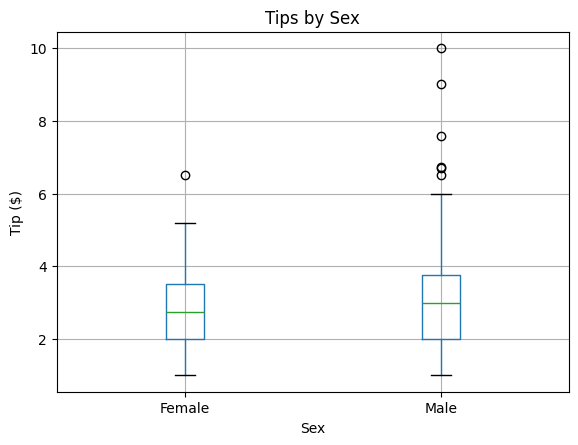

In [ ]:
print("Average tip by sex:")
print(tips.groupby("sex")["tip"].mean())

# Boxplot
tips.boxplot(column="tip", by="sex")
plt.title("Tips by Sex")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("Tip ($)")
plt.show()

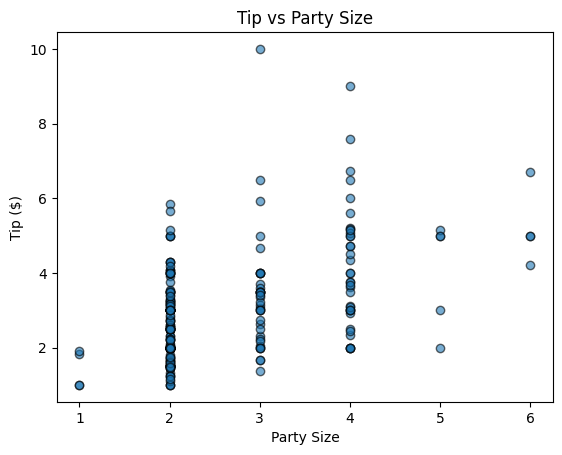

In [ ]:
plt.scatter(tips["size"], tips["tip"], alpha=0.6, edgecolor="black")
plt.title("Tip vs Party Size")
plt.xlabel("Party Size")
plt.ylabel("Tip ($)")
plt.show()